# Explore here

In [6]:
# import the libraries top use
import numpy as np
import pandas as pd
import seaborn as sns

## Step 1: Problem statement and data collection

We can see the data information in the page <https://insideairbnb.com/new-york-city/> where we can understand that we are seeing a list of homes/apartments, private, shared rooms, and more recently hotel rooms

In [7]:
from utils import load_data

file_path = '../data/raw/AB_NYC_2019.csv'
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

df = load_data(file_path=file_path, url=url)

Loading data from file: ../data/raw/AB_NYC_2019.csv


### The problem to solve is: we want to predict the value of a house based in some information

## Step 2: Exploration and data cleaning

In [8]:
# see the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# describe
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [10]:
# see the first rows
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [11]:
# see the last rows
df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [12]:
# lets get the shape of the data
print(f"Shape of the data: {df.shape} \n")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Shape of the data: (48895, 16) 

Number of rows: 48895
Number of columns: 16


### Eliminate duplicates

In [13]:
# verify if there are duplicates
duplicates = df.drop("id", axis=1).duplicated().sum()
print(f'Number of duplicated rows: {duplicates}')

Number of duplicated rows: 0


We do not have duplicates so we do not have to delete any duplicated rows.

### Eliminate irrelevant information (Step 5: Feature engineering)

We can eliminate not useful data as [name, host_id, last_review] that cannot be used by the model. We can also delete the categorical data because that is nos useful to use by a regression model, but the exercise we are going to keep it and analyze it.

In [14]:
# drop the id, hast_id column
df.drop(["host_id", "name", "host_name", "last_review"], axis=1, inplace=True)

In [15]:
# view the data after the delete
df.head()

id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539            Brooklyn    Kensington  40.64749  -73.97237   
1  2595           Manhattan       Midtown  40.75362  -73.98377   
2  3647           Manhattan        Harlem  40.80902  -73.94190   
3  3831            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [16]:
# describe the df
df.describe()

id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   1.901714e+07     40.728949    -73.952170    152.720687        7.029962   
std    1.098311e+07      0.054530      0.046157    240.154170       20.510550   
min    2.539000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    9.471945e+06     40.690100    -73.983070     69.000000        1.000000   
50%    1.967728e+07     40.723070    -73.955680    106.000000        3.000000   
75%    2.915218e+07     40.763115    -73.936275    175.000000        5.000000   
max    3.648724e+07     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

### Impute missing data (Step 5: Feature engineering)

Let's see the information of the df

In [17]:
# see the info of the df after the deletes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

Let's see if the "reviews_per_month" column shows 0 values

In [18]:
len(df.query(f'`reviews_per_month` == 0'))

0

Because we can see that there are no 0 values we are going to impute the value of 0 to those apartments that does not have reviews.

In [19]:
# put 
df['reviews_per_month'] = df['reviews_per_month'].fillna(value=0)

In [20]:
# see the head, this line is mostly to see the df in Data Wrangler
df.head(15)

id neighbourhood_group       neighbourhood  latitude  longitude  \
0   2539            Brooklyn          Kensington  40.64749  -73.97237   
1   2595           Manhattan             Midtown  40.75362  -73.98377   
2   3647           Manhattan              Harlem  40.80902  -73.94190   
3   3831            Brooklyn        Clinton Hill  40.68514  -73.95976   
4   5022           Manhattan         East Harlem  40.79851  -73.94399   
5   5099           Manhattan         Murray Hill  40.74767  -73.97500   
6   5121            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7   5178           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8   5203           Manhattan     Upper West Side  40.80178  -73.96723   
9   5238           Manhattan           Chinatown  40.71344  -73.99037   
10  5295           Manhattan     Upper West Side  40.80316  -73.96545   
11  5441           Manhattan      Hell's Kitchen  40.76076  -73.98867   
12  5803            Brooklyn         South Slope  40.66829  -73.98779   
13  6021           Manhattan     Upper West Side  40.79826  -73.96113   
14  6090           Manhattan        West Village  40.73530  -74.00525   

          room_type  price  minimum_nights  number_of_reviews  \
0      Private room    149               1                  9   
1   Entire home/apt    225               1                 45   
2      Private room    150               3                  0   
3   Entire home/apt     89               1                270   
4   Entire home/apt     80              10                  9   
5   Entire home/apt    200               3                 74   
6      Private room     60              45                 49   
7      Private room     79               2                430   
8      Private room     79               2                118   
9   Entire home/apt    150               1                160   
10  Entire home/apt    135               5                 53   
11     Private room     85               2                188   
12     Private room     89               4                167   
13     Private room     85               2                113   
14  Entire home/apt    120              90                 27   

    reviews_per_month  calculated_host_listings_count  availability_365  
0                0.21                               6               365  
1                0.38                               2               355  
2                0.00                               1               365  
3                4.64                               1               194  
4                0.10                               1                 0  
5                0.59                               1               129  
6                0.40                               1                 0  
7                3.47                               1               220  
8                0.99                               1                 0  
9                1.33                               4               188  
10               0.43                               1                 6  
11               1.50                               1                39  
12               1.34                               3               314  
13               0.91                               1               333  
14               0.22                               1                 0

In [21]:
# see the info of the df after imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [22]:
# see the distribution of the data
df.describe()

id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   1.901714e+07     40.728949    -73.952170    152.720687        7.029962   
std    1.098311e+07      0.054530      0.046157    240.154170       20.510550   
min    2.539000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    9.471945e+06     40.690100    -73.983070     69.000000        1.000000   
50%    1.967728e+07     40.723070    -73.955680    106.000000        3.000000   
75%    2.915218e+07     40.763115    -73.936275    175.000000        5.000000   
max    3.648724e+07     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.090910                        7.143982   
std            44.550582           1.597283                       32.952519   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

### Re categorize and impute columns to make the data readable (Step 5: Feature engineering)

After doing parte of the analysis we saw that the data is not readable because there are oo much outliers, so we need to re categorize and impute the data.

#### Re categorize the neighbourhood column

In [23]:
### see the counts for the neighbourhood
neighbourhood_counts = pd.DataFrame(df['neighbourhood'].value_counts().reset_index())
neighbourhood_counts['percentage'] = np.round(neighbourhood_counts['count'] / len(df), 2)

In [24]:
neighbourhood_counts

neighbourhood  count  percentage
0          Williamsburg   3920        0.08
1    Bedford-Stuyvesant   3714        0.08
2                Harlem   2658        0.05
3              Bushwick   2465        0.05
4       Upper West Side   1971        0.04
..                  ...    ...         ...
216        Richmondtown      1        0.00
217      Fort Wadsworth      1        0.00
218            New Dorp      1        0.00
219           Rossville      1        0.00
220         Willowbrook      1        0.00

[221 rows x 3 columns]

We are going to re categorize everything that has a percentage less than 4% to the label "other"

In [25]:
# re categorize
df['neighbourhood'] = df['neighbourhood'].map(
    lambda neighbourhood: neighbourhood if
    neighbourhood_counts[neighbourhood_counts['neighbourhood'] == neighbourhood]['percentage'].values[
        0] >= 0.04 else "Other"
    )

Verify the re categorizations worked

In [26]:
### see the counts for the neighbourhood
neighbourhood_counts = pd.DataFrame(df['neighbourhood'].value_counts().reset_index())
neighbourhood_counts['percentage'] = neighbourhood_counts['count'] / len(df)

print(f'Verify the output of the percentage {neighbourhood_counts['percentage'].sum()}')

Verify the output of the percentage 1.0


In [27]:
neighbourhood_counts

neighbourhood  count  percentage
0               Other  28558    0.584068
1        Williamsburg   3920    0.080172
2  Bedford-Stuyvesant   3714    0.075959
3              Harlem   2658    0.054361
4            Bushwick   2465    0.050414
5     Upper West Side   1971    0.040311
6      Hell's Kitchen   1958    0.040045
7        East Village   1853    0.037898
8     Upper East Side   1798    0.036773

#### Impute the price column to eliminate outliers

The price column has a lot of outliers so we need to treat the data. Lets filter based on the quantile 0.01 and 0.99

In [28]:
# get the low and high quantiles
q_low = df["price"].quantile(0.01)
q_hi = df["price"].quantile(0.90)

print(f'Value with quantile 0.01: {q_low}')
print(f'Value with quantile 0.99: {q_hi}')

# filter the dataframe
filtered_df = df[(df["price"] < q_hi) & (df["price"] > q_low)]

Value with quantile 0.01: 30.0
Value with quantile 0.99: 269.0


In [29]:
# see the info of the dataframe
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43325 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43325 non-null  int64  
 1   neighbourhood_group             43325 non-null  object 
 2   neighbourhood                   43325 non-null  object 
 3   latitude                        43325 non-null  float64
 4   longitude                       43325 non-null  float64
 5   room_type                       43325 non-null  object 
 6   price                           43325 non-null  int64  
 7   minimum_nights                  43325 non-null  int64  
 8   number_of_reviews               43325 non-null  int64  
 9   reviews_per_month               43325 non-null  float64
 10  calculated_host_listings_count  43325 non-null  int64  
 11  availability_365                43325 non-null  int64  
dtypes: float64(3), int64(6), object(3)
me

In [30]:
# describe the dataframe
filtered_df.describe()

id      latitude     longitude         price  minimum_nights  \
count  4.332500e+04  43325.000000  43325.000000  43325.000000    43325.000000   
mean   1.875394e+07     40.728381    -73.950110    113.523970        6.874922   
std    1.088814e+07      0.055518      0.046338     57.883562       19.997584   
min    2.539000e+03     40.499790    -74.244420     31.000000        1.000000   
25%    9.350645e+06     40.688910    -73.981070     65.000000        1.000000   
50%    1.933208e+07     40.721180    -73.953840    100.000000        2.000000   
75%    2.863529e+07     40.763660    -73.933670    150.000000        5.000000   
max    3.648724e+07     40.913060    -73.712990    268.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       43325.000000       43325.000000                    43325.000000   
mean           24.301881           1.112116                        6.058211   
std            45.788384           1.616377                       28.991223   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.050000                        1.000000   
50%             6.000000           0.390000                        1.000000   
75%            25.000000           1.620000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      43325.000000  
mean         107.803762  
std          129.695030  
min            0.000000  
25%            0.000000  
50%           37.000000  
75%          211.000000  
max          365.000000

Save the new filtered dataframe to the dataframe to work

In [31]:
# set teh df as the filtered df
df = filtered_df

## Step 3: Analysis of univariate variables

A univariate variable is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

### Analysis of categorical variables

A categorical variable is a type of variable that can be one of a limited number of categories or groups. These groups are often nominal (e.g., the color of a car: red, blue, black, etc., but none of these colors is inherently "greater" or "better" than the others) but can also be represented by finite numbers.

To represent these types of variables the best tool are histograms. Before we start plotting, we must identify which ones are categorical, and this can be easily checked by analyzing the range of values. In this case, the categorical variables are "neighbourhood_group", "neighbourhood" and "room_type", so we have a total of 3 columns of categorical data:

In [32]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

<Axes: xlabel='neighbourhood_group', ylabel='Count'>

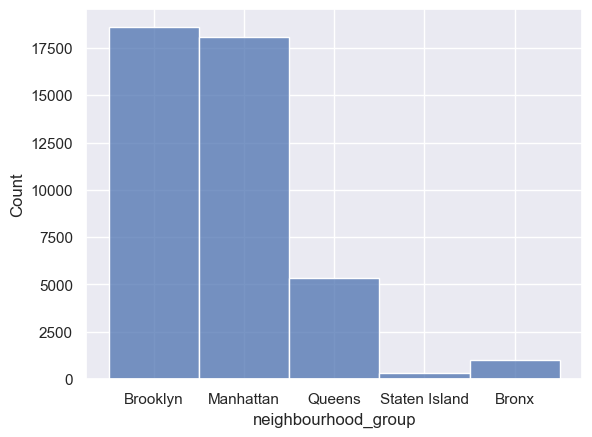

In [33]:
# create the "neighbourhood_group" histogram
sns.histplot(data=df, x="neighbourhood_group")

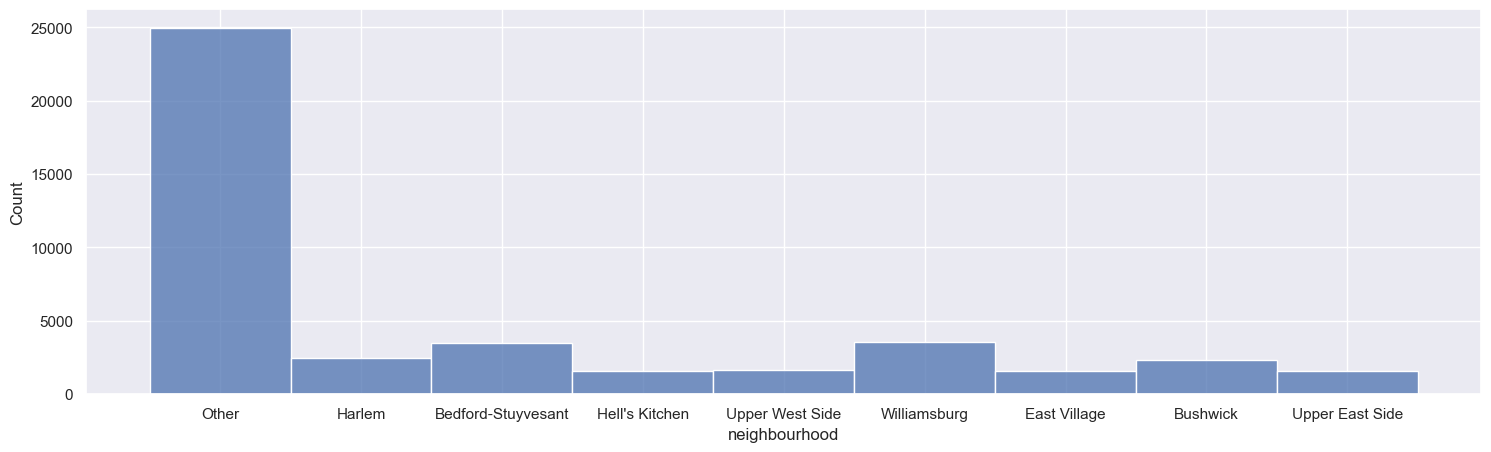

In [34]:
# create the "neighbourhood" histogram
plt.subplots(figsize=(18, 5))
sns.histplot(data=df, x="neighbourhood")
plt.show()

<Axes: xlabel='room_type', ylabel='Count'>

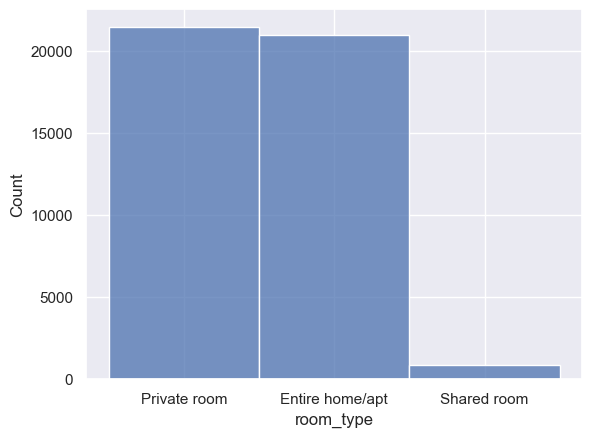

In [35]:
# create the "neighbourhood_group" histogram
sns.histplot(data=df, x="room_type")

With this histograms we could learn how the data is distributed, so we can say that:

- The majority of the neighbor group are based in "Brooklyn" and "Manhattan"
- The neighborhoods with the largest number of houses/rooms are "Bedford-Stuyvesant", "Harlem", and "Williamsburg".
- The majority of the houses/rooms are of type "Private room" and "Entire home/apt:

### Analysis on numeric variables

A numeric variable is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc.) in an infinite range. A numerical categorical variable can also be a numerical variable (e.g. for further analysis, we can take the class Survived as numerical also to study relationships). They are usually represented using a histogram and a boxplot, displayed together. 

Before starting to plot, we must also identify which are the numerical ones, which are "latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count" and "availability_365".

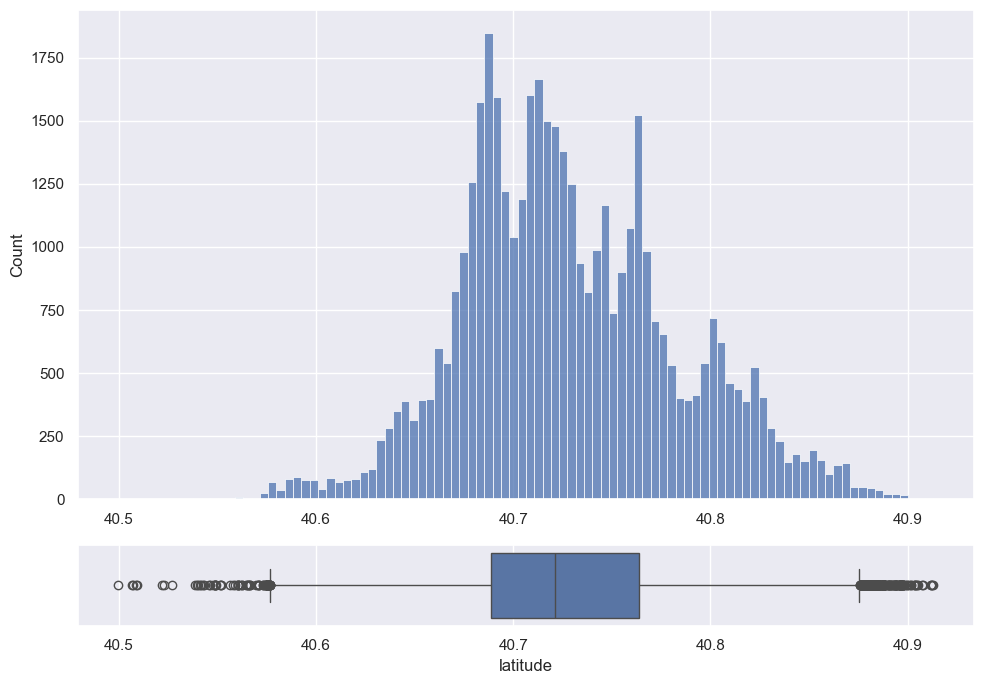

In [36]:
fig, axis = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

# creating a multiple figure with histogram and box plot for latitude
sns.histplot(ax=axis[0], data=df, x="latitude").set(xlabel=None)
sns.boxplot(ax=axis[1], data=df, x="latitude")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

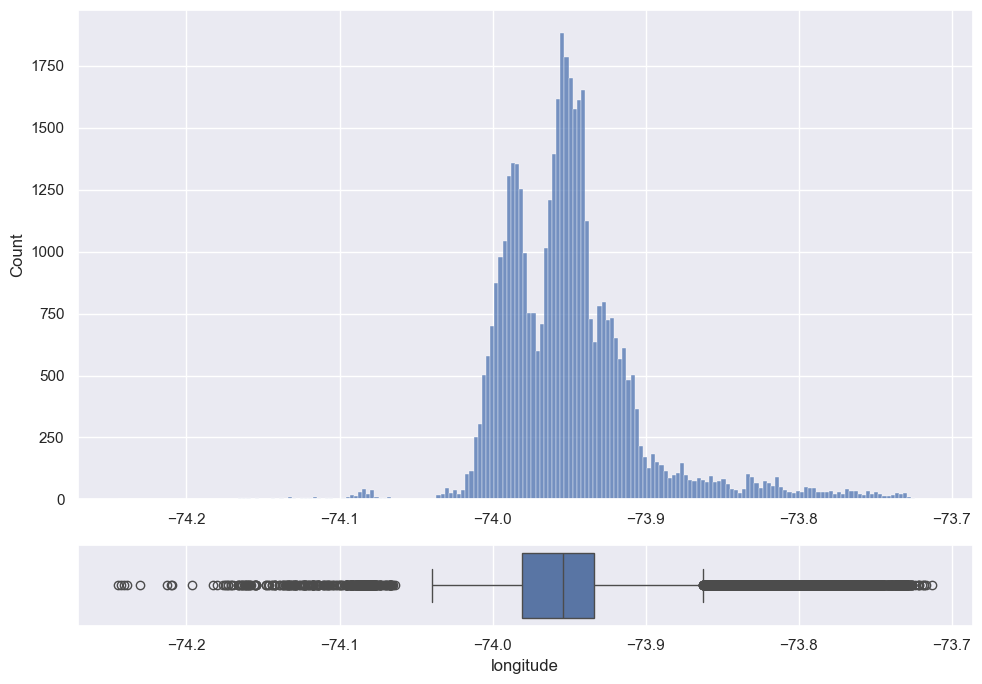

In [37]:
fig, axis = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

# creating a multiple figure with histogram and box plot for longitude
sns.histplot(ax=axis[0], data=df, x="longitude").set(xlabel=None)
sns.boxplot(ax=axis[1], data=df, x="longitude")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

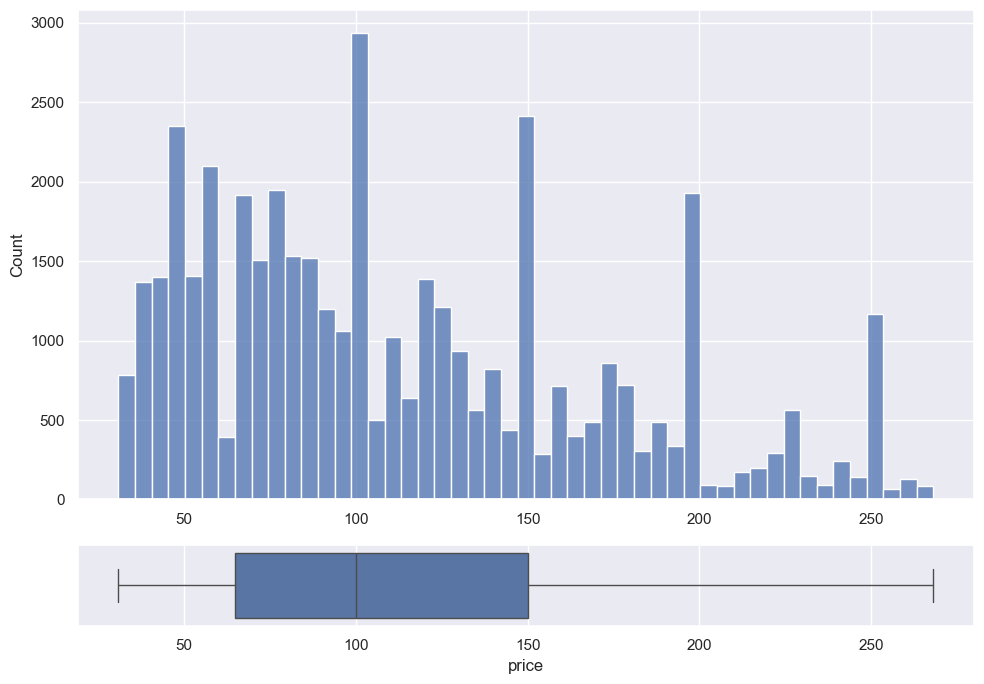

In [38]:
fig, axis = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

# creating a multiple figure with histogram and box plot for price
sns.histplot(ax=axis[0], data=df, x="price").set(xlabel=None)
sns.boxplot(ax=axis[1], data=df, x="price")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

We can see that we have many outliers in the price column, more processing of this column is required.

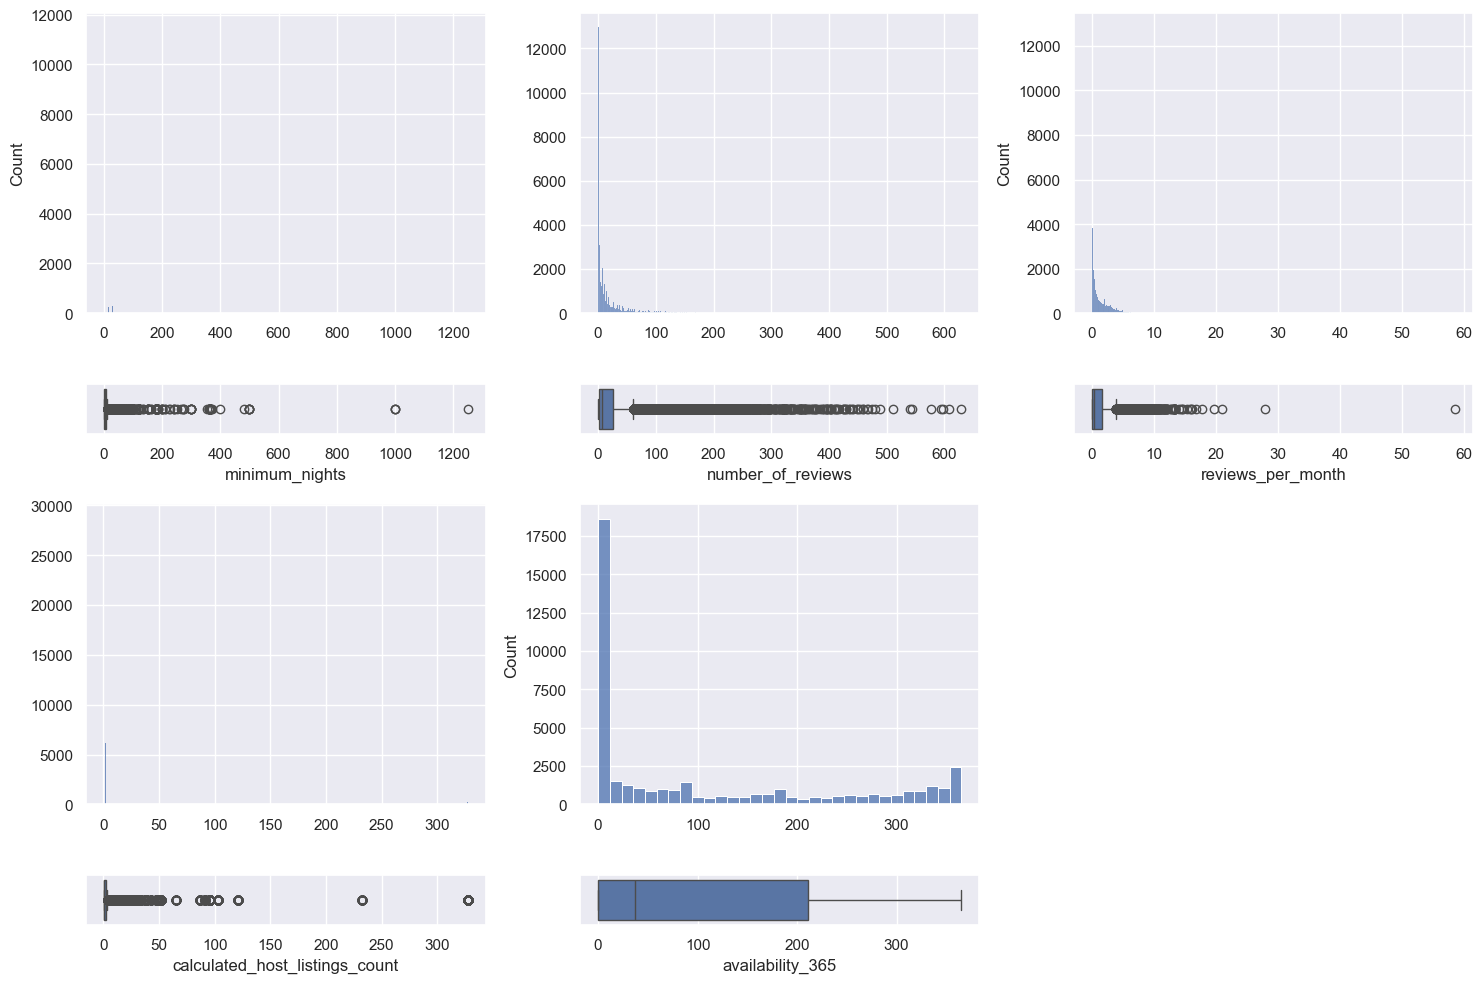

In [39]:
fig, axis = plt.subplots(4, 3, figsize=(15, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# creating a multiple figure with histograms and box plots
# first row
# 	first col
sns.histplot(ax=axis[0, 0], data=df, x="minimum_nights").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="minimum_nights")
# 	second col
sns.histplot(ax=axis[0, 1], data=df, x="number_of_reviews").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="number_of_reviews")
# 	third col
sns.histplot(ax=axis[0, 2], data=df, x="reviews_per_month").set(xlabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="reviews_per_month")

# second row
# 	first col
sns.histplot(ax=axis[2, 0], data=df, x="calculated_host_listings_count").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="calculated_host_listings_count")
# 	second col
sns.histplot(ax=axis[2, 1], data=df, x="availability_365").set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="availability_365")
# 	third col, delete this plots
fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Lets graph some values apart to better see the results

array([[<Axes: title={'center': 'minimum_nights'}>]], dtype=object)

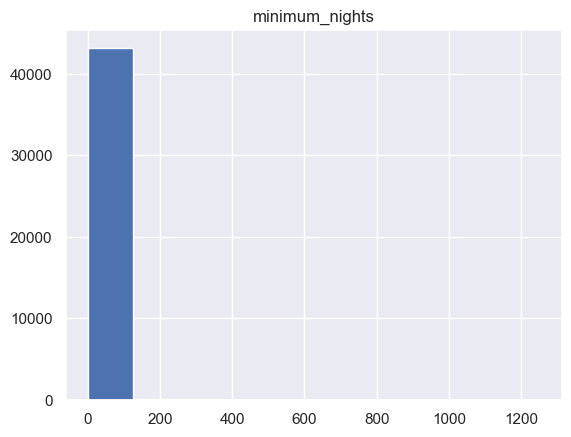

In [40]:
# histogram with pandas to verify the results
df.hist(column='minimum_nights')

With this results we can see that this value does not seem useful for the creation of the model.

array([[<Axes: title={'center': 'reviews_per_month'}>]], dtype=object)

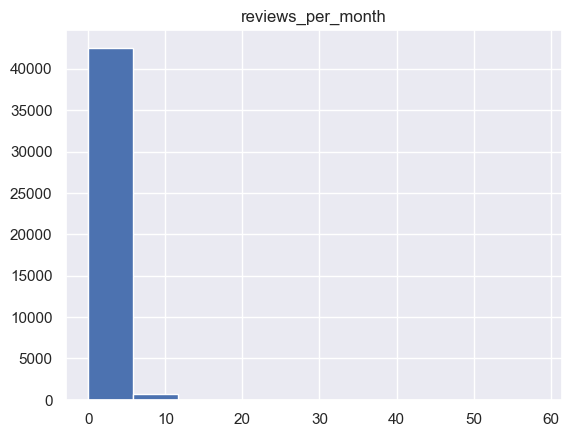

In [41]:
# histogram with pandas to verify the results
df.hist(column='reviews_per_month')

array([[<Axes: title={'center': 'calculated_host_listings_count'}>]],
      dtype=object)

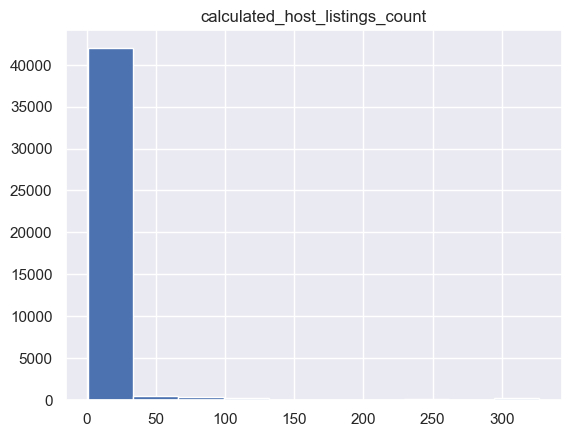

In [42]:
# histogram with pandas to verify the results
df.hist(column='calculated_host_listings_count')

With this we can see that all this columns does not seem very valuable or useful for the model, so we could not use them for the model.

## Step 4: Analysis of multivariate variables

After analyzing the characteristics one by one, it is time to analyze them in relation to the predictor and to themselves, in order to draw clearer conclusions about their relationships and to be able to make decisions about their processing.

### Numerical-numerical analysis

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. Scatterplots and correlation analysis are used to compare two numerical columns.

Lets remember that our numerical variables are "latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count" and "availability_365".

In [43]:
# lets get the numerical data
numerical_data = df[["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month",
                     "calculated_host_listings_count", "availability_365"]]

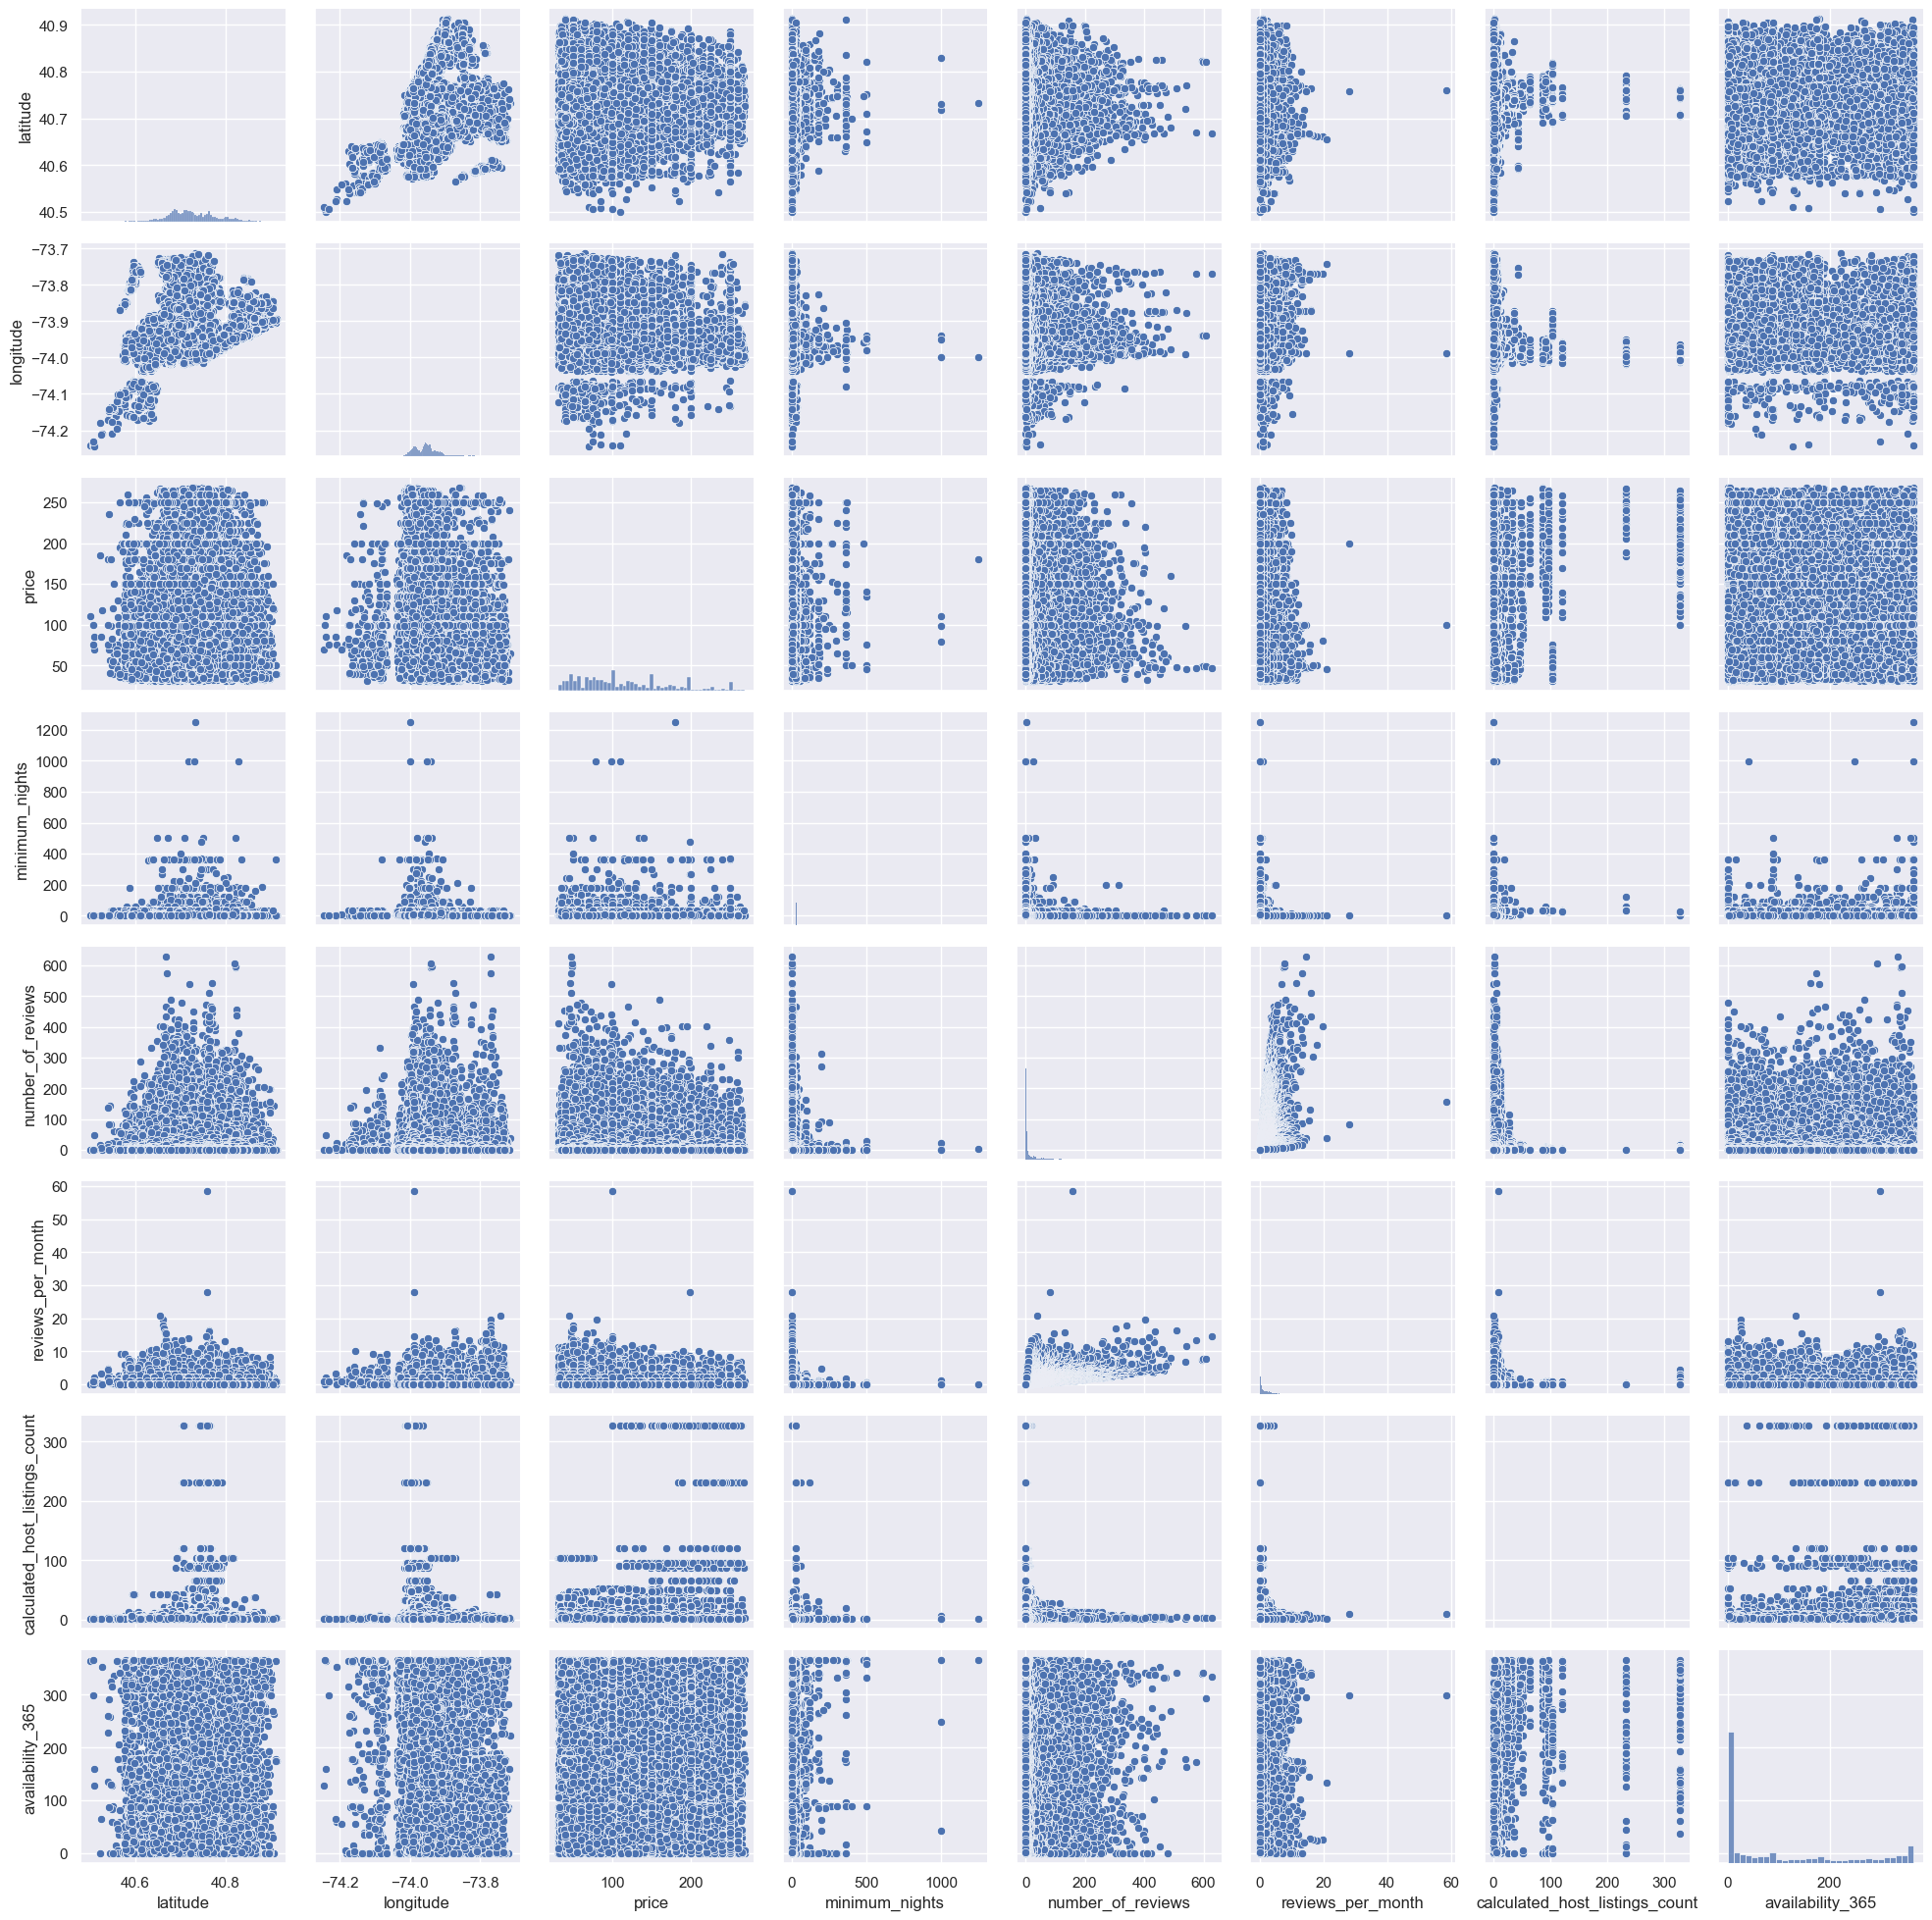

In [44]:
g = sns.PairGrid(numerical_data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Because we want to create a model to predict the price we need to see the price row and the relation between the values and that variable.

#### Correlation analysis

Now lets create the correlation matrix

<Axes: >

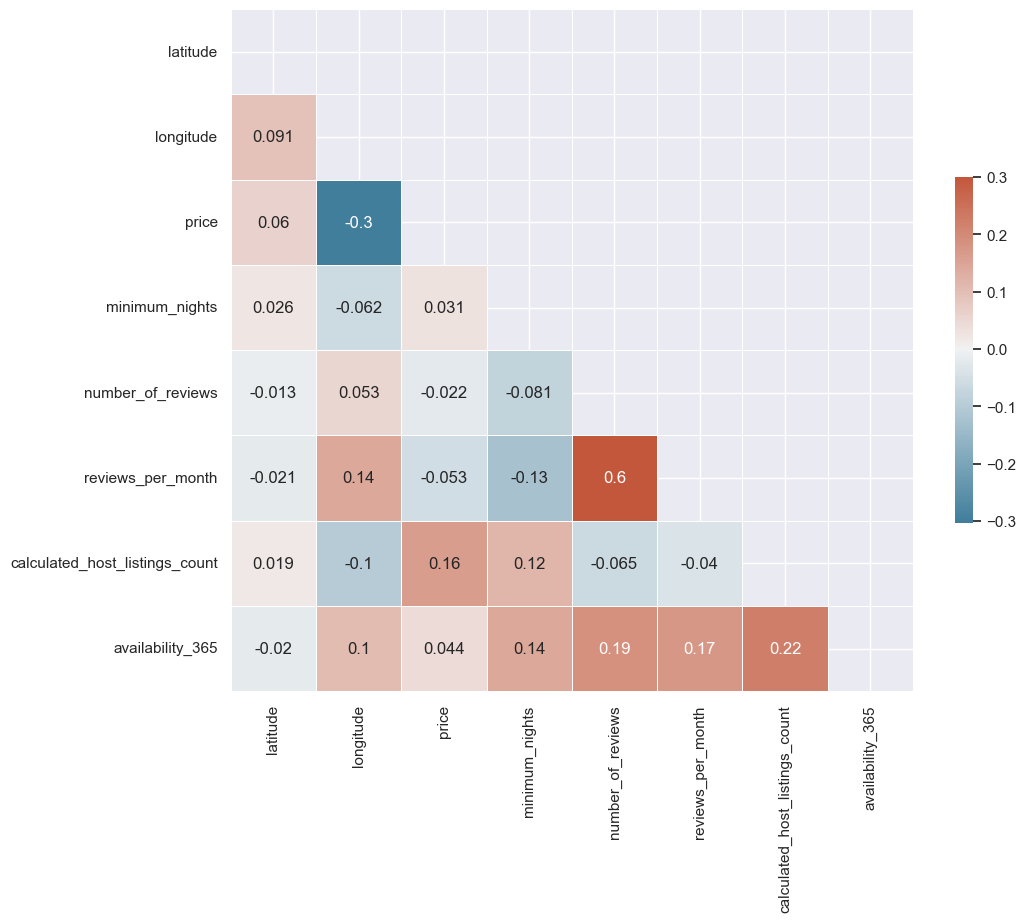

In [45]:
# compute the correlation matrix
corr = numerical_data.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    annot=True,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

We can see that the variables that have the best correlation with price are "longitude" with a negative correlation of -0.15 and “availability_365” with a positive correlation of 0.082, these are not the best results so we can think that the data could not be used to create a price predictor.

### Categorical-categorical analysis

When the two variables being compared have categorical data, the analysis is said to be categorical-categorical. Histograms and combinations are used to compare two categorical columns.

In [46]:
# lets get the categorical data
categorical_data = df[["neighbourhood_group", "neighbourhood", "room_type"]]

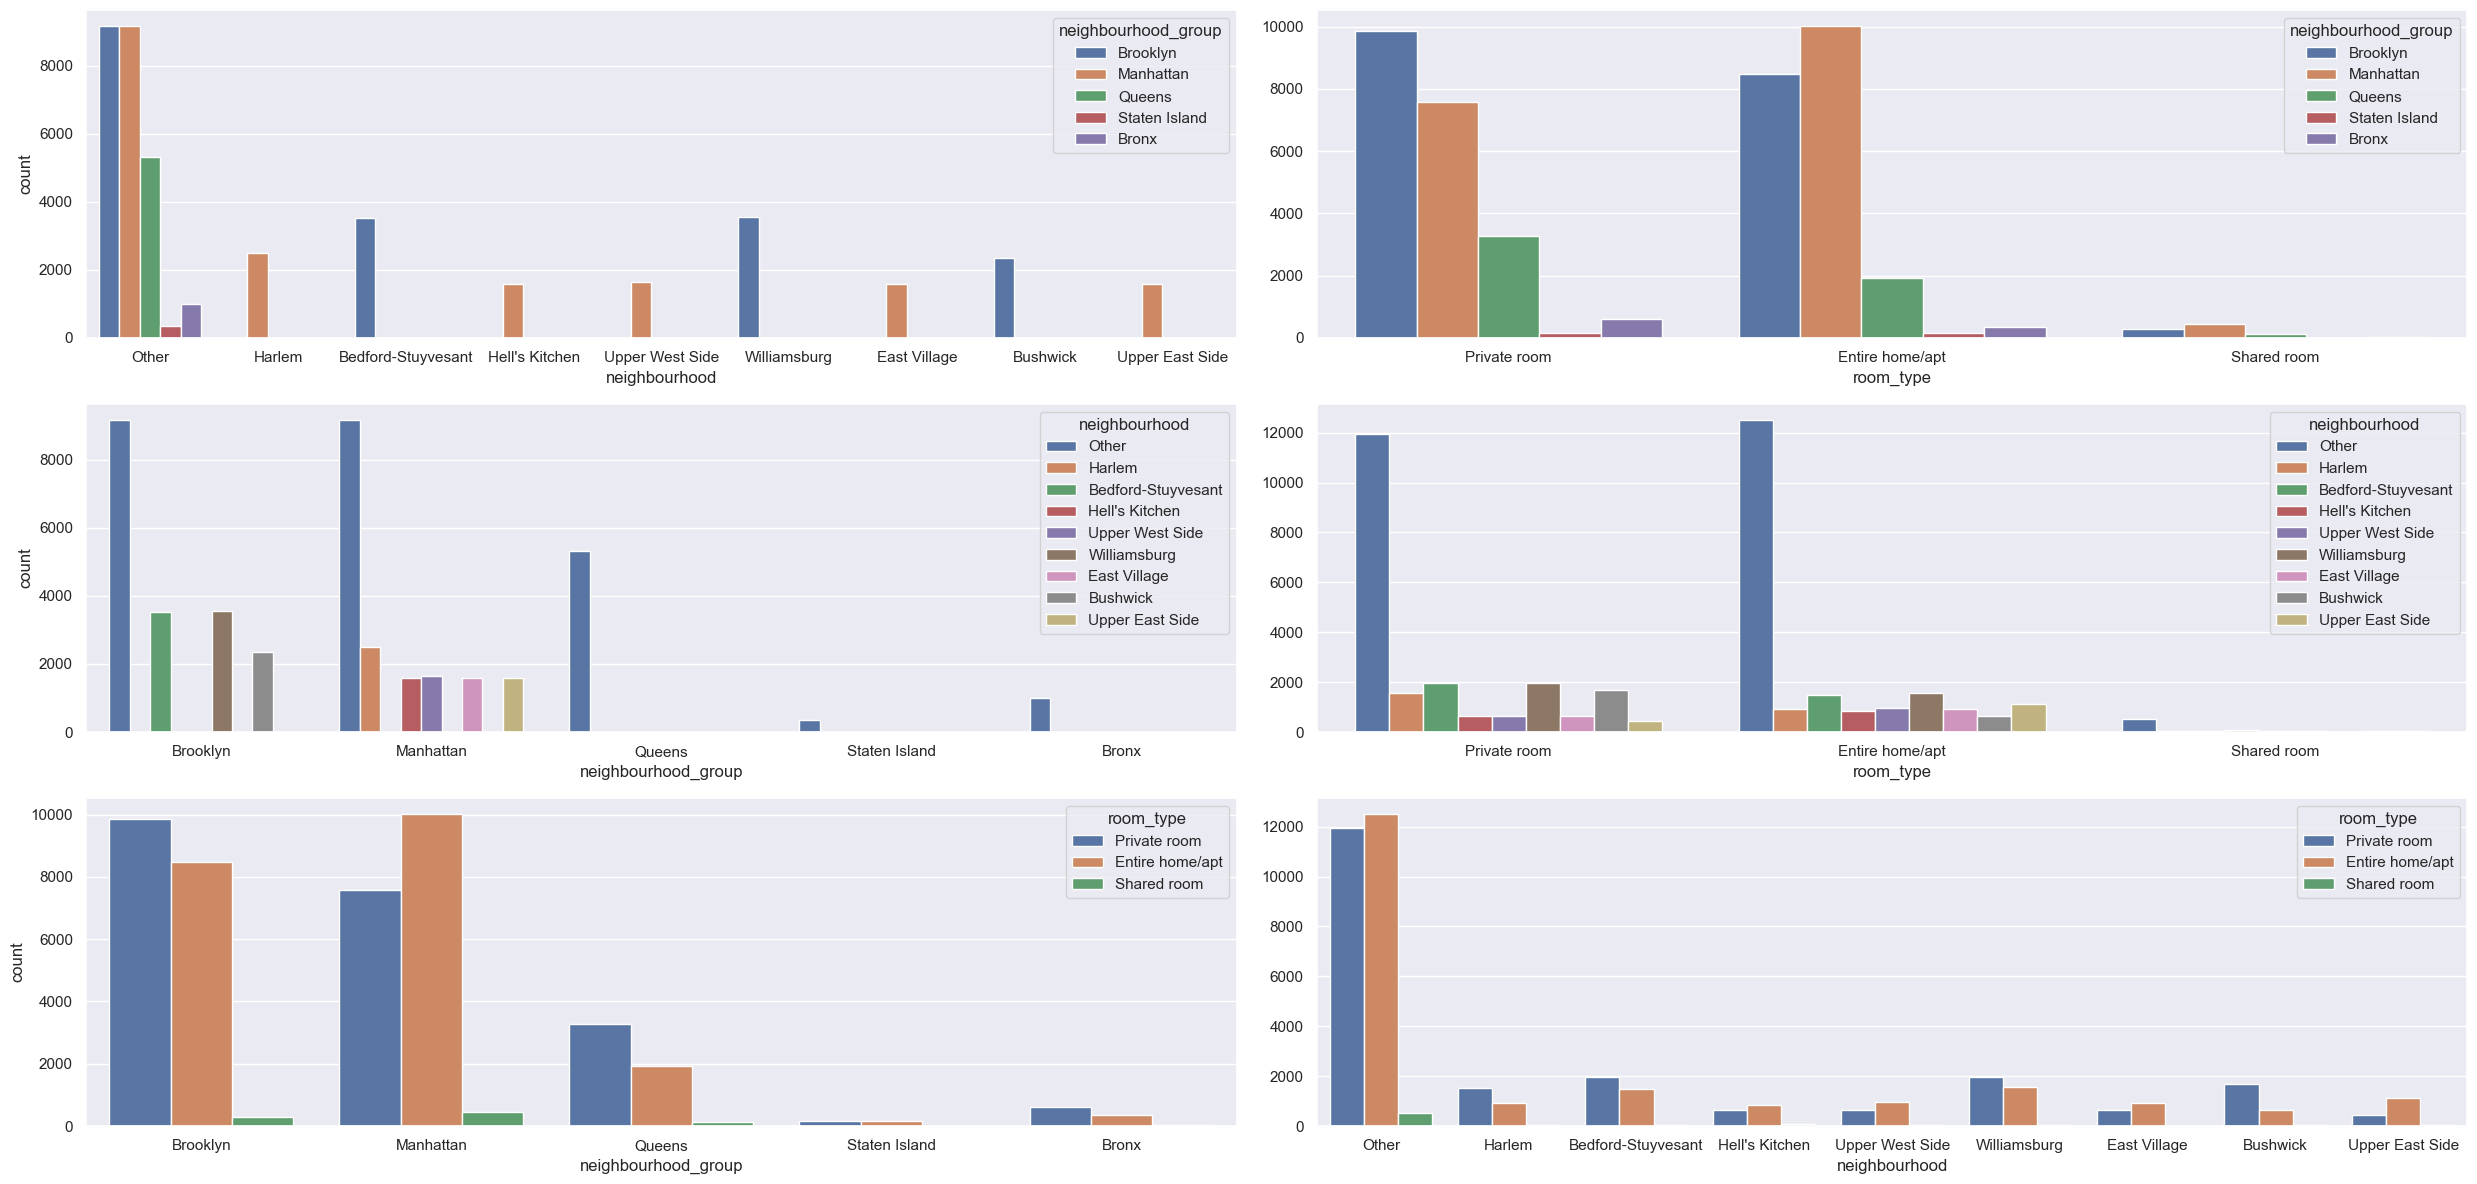

In [47]:
fig, axis = plt.subplots(3, 2, figsize=(25, 12))

sns.countplot(ax=axis[0, 0], data=categorical_data, x="neighbourhood", hue="neighbourhood_group")
sns.countplot(ax=axis[0, 1], data=categorical_data, x="room_type", hue="neighbourhood_group").set(ylabel=None)

sns.countplot(ax=axis[1, 0], data=categorical_data, x="neighbourhood_group", hue="neighbourhood")
sns.countplot(ax=axis[1, 1], data=categorical_data, x="room_type", hue="neighbourhood").set(ylabel=None)

sns.countplot(ax=axis[2, 0], data=categorical_data, x="neighbourhood_group", hue="room_type")
sns.countplot(ax=axis[2, 1], data=categorical_data, x="neighbourhood", hue="room_type").set(ylabel=None)

plt.tight_layout()

plt.show()

#### Correlation analysis

The goal of correlation analysis with categorical-categorical data is to uncover patterns and dependencies between variables, aiding in understanding how they interact within a dataset. This analysis is fundamental in various fields including social sciences, marketing research, and epidemiology, where categorical data often represent key attributes of interest.

This analysis aims to determine whether and how the categories of one variable are related to the categories of another.

In [48]:
# factorize the dataframe
categorical_data_factorized = pd.DataFrame()

categorical_data_factorized["neighbourhood_group"] = pd.factorize(categorical_data.loc[:, "neighbourhood_group"])[0]
categorical_data_factorized["neighbourhood"] = pd.factorize(categorical_data.loc[:, "neighbourhood"])[0]
categorical_data_factorized["room_type"] = pd.factorize(categorical_data.loc[:, "room_type"])[0]

<Axes: >

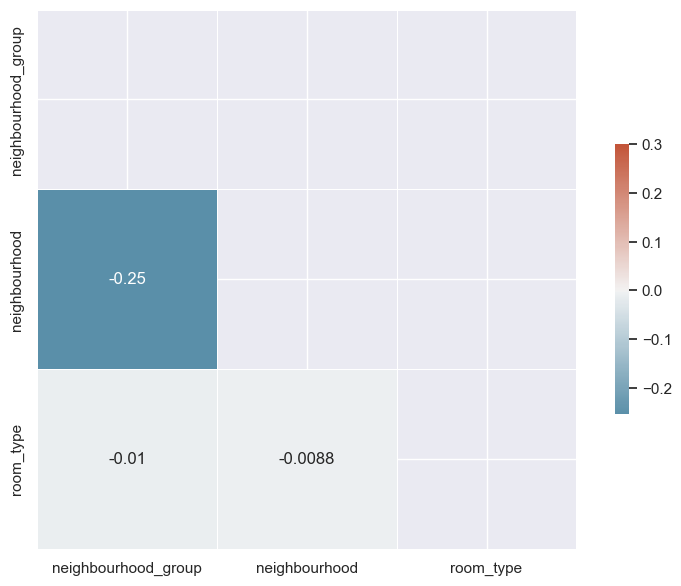

In [49]:
# compute the correlation matrix
corr = categorical_data_factorized.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    annot=True,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

We can see there is a negative correlation between the variables neighbourhood and neighbourhood_group, so there might be useful insights to get from it. The others correlations are weak and not significant enough.

### Numerical-categorical analysis (complete)

This is the most detailed analysis we can carry out. To do this, we simply have to calculate the correlations between the variables, since this is the best indication of the relationships. Thus, once we have verified that there is a relationship, we can go deeper into the study. Another element that can be very helpful is to obtain the two-by-two relationships between all the data in the dataset. This is, in part, redundant because there are many things that we have already calculated, so it is optional.

In [50]:
# factorize the dataframe
factorized_df = df.copy()

factorized_df["neighbourhood_group"] = pd.factorize(df.loc[:, "neighbourhood_group"])[0]
factorized_df["neighbourhood"] = pd.factorize(df.loc[:, "neighbourhood"])[0]
factorized_df["room_type"] = pd.factorize(df.loc[:, "room_type"])[0]

<Axes: >

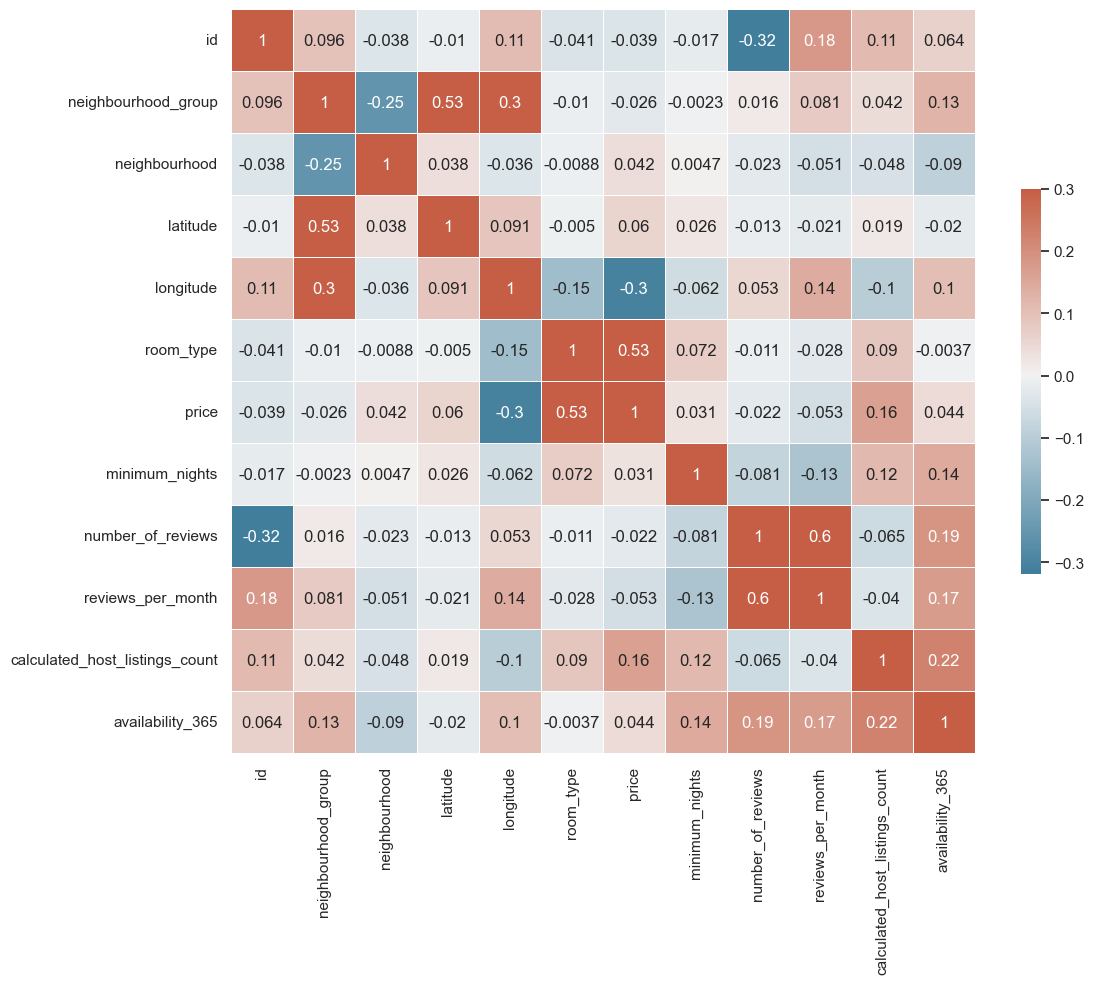

In [51]:
# compute the correlation matrix
corr = factorized_df.corr()

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    annot=True,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

There is a strong positive relationship between reviews_per_month and number_of_reviews (which makes sense), latitude and neighbourhood_group, between longitude and neighbourhood_group, price and room_type. And there is a medium negative relationship between neighborhood and neighborhood_group, price and longitude. There is a strong correlation in the column id but that is not useful fo the analysis. The others correlations are weak and not significant enough.

#### Final pairplot of all the data

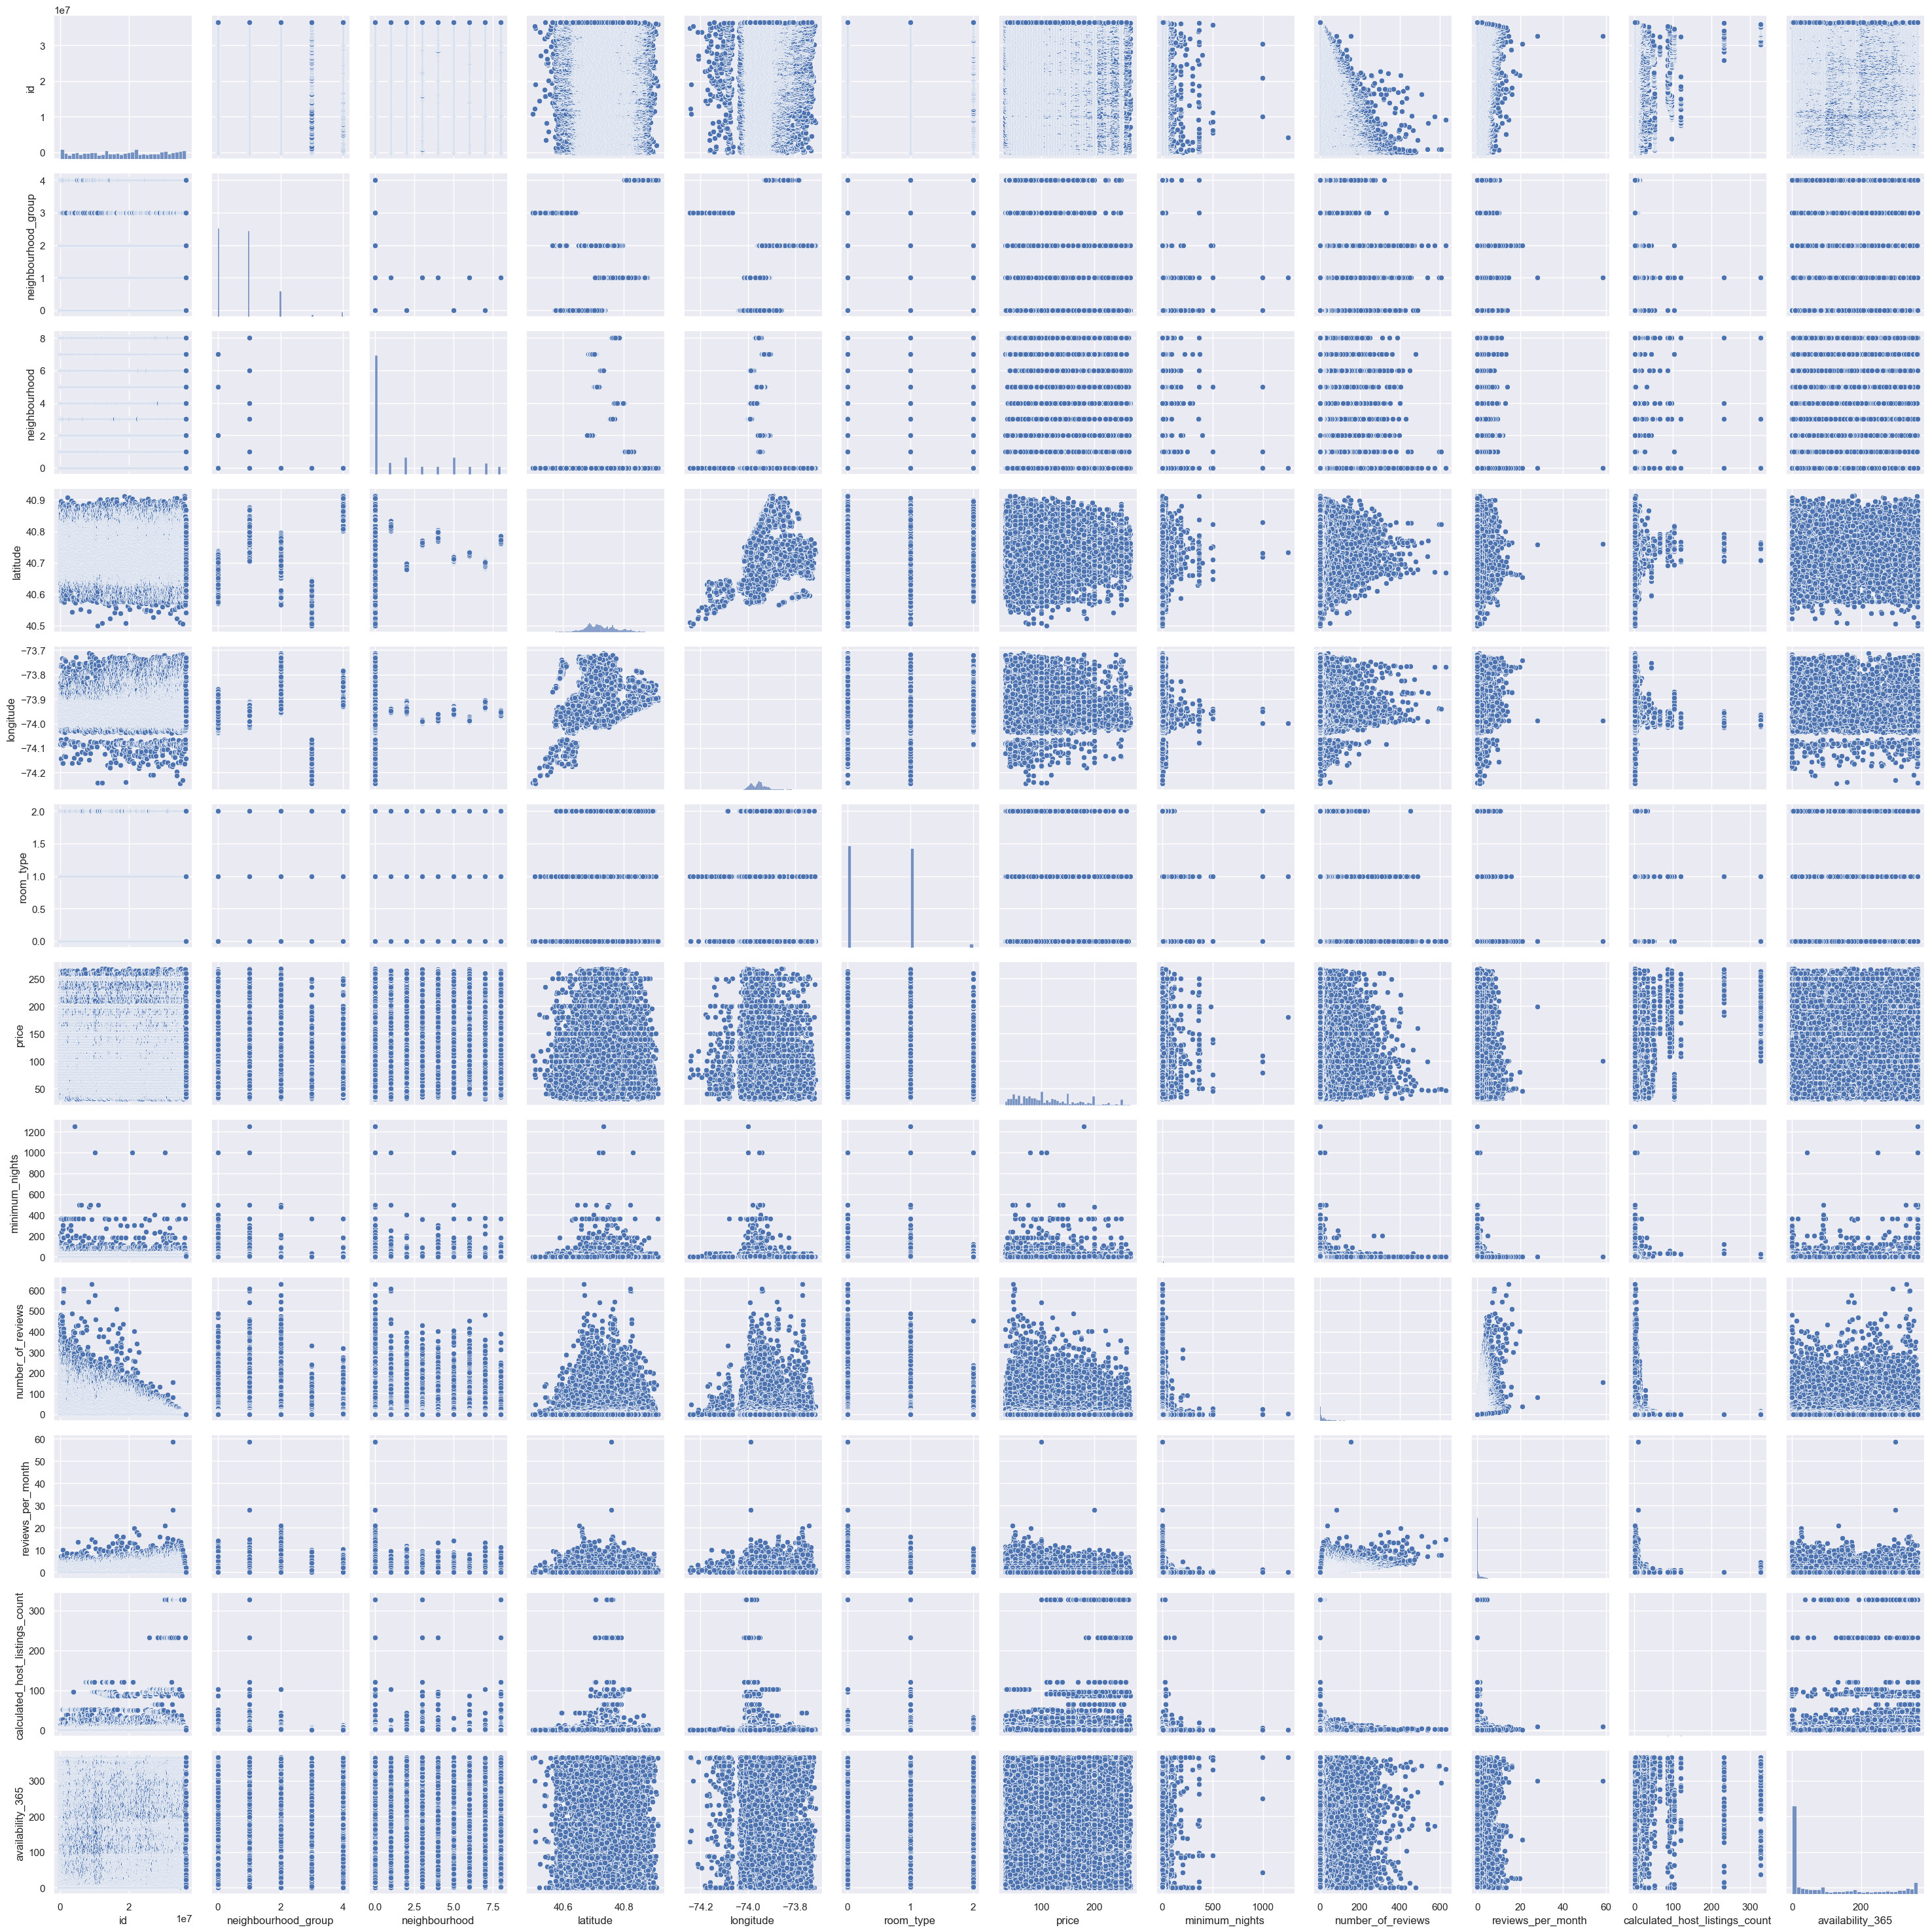

In [52]:
# pairplot of all the data
g = sns.PairGrid(factorized_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

## Step 5: Feature engineering

Feature engineering is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques, such as normalization, data transformation, and so on. The goal is to improve the accuracy of the model and/or reduce the complexity of the model, thus making it easier to interpret.

We did this in the "Step 2", the re categorization and imputation of data. The parts where that process was done has the "Step 5: Feature engineering" writing in the title.

### Get the train and test data

In [95]:
# set the final dataframe to work
final_df = factorized_df.copy()
final_df = final_df.drop("id", axis=1)

In [103]:
# see the final dataframe
final_df.head()

neighbourhood_group  neighbourhood  latitude  longitude  room_type  price  \
0                    0              0  40.64749  -73.97237          0    149   
1                    1              0  40.75362  -73.98377          1    225   
2                    1              1  40.80902  -73.94190          0    150   
3                    0              0  40.68514  -73.95976          1     89   
4                    1              0  40.79851  -73.94399          1     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0               0.00   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [105]:
# see the final dataframe
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43325 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             43325 non-null  int64  
 1   neighbourhood                   43325 non-null  int64  
 2   latitude                        43325 non-null  float64
 3   longitude                       43325 non-null  float64
 4   room_type                       43325 non-null  int64  
 5   price                           43325 non-null  int64  
 6   minimum_nights                  43325 non-null  int64  
 7   number_of_reviews               43325 non-null  int64  
 8   reviews_per_month               43325 non-null  float64
 9   calculated_host_listings_count  43325 non-null  int64  
 10  availability_365                43325 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 5.0 MB


In [97]:
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples
X = final_df.drop("price", axis=1)
y = final_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train.head()

neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
9906                     0              2  40.68268  -73.92825          0   
26223                    0              0  40.72965  -73.95707          0   
46306                    0              2  40.68778  -73.93190          0   
25434                    0              2  40.67907  -73.94916          1   
21261                    0              2  40.68869  -73.92310          0   

       minimum_nights  number_of_reviews  reviews_per_month  \
9906                1                  2               0.04   
26223               2                  7               0.34   
46306              30                  0               0.00   
25434               2                 18               0.86   
21261               1                 10               0.35   

       calculated_host_listings_count  availability_365  
9906                                1                 0  
26223                               1                 0  
46306                              27               240  
25434                               2                86  
21261                               1               173

In [98]:
print(y)

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 43325, dtype: int64


### Scaling the data

We are going to scale the data to use using the RobustScaler because we have a lot of outliers in various features of our data.

In [99]:
# numerical columns
numerical_columns = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "reviews_per_month",
                     "calculated_host_listings_count", "availability_365"]

# categorical columns
categorical_columns = ["neighbourhood_group", "neighbourhood", "room_type"]

In [100]:
from sklearn.preprocessing import RobustScaler

# create the instance of the scaler
transformer = RobustScaler()

# fit the scaler to the train data
transformer.fit(X_train[numerical_columns])

# scale the X train data
X_train_numerical_scal_data = transformer.transform(X_train[numerical_columns])
# transform the data to dataframe
X_train_numerical_scal_df = pd.DataFrame(X_train_numerical_scal_data, index=X_train.index, columns=numerical_columns)
# concat to the categorical data
X_train_scal = pd.concat([X_train_numerical_scal_df, final_df[categorical_columns]], axis=1)

# scale the X test data
X_test_numerical_scal_data = transformer.transform(X_test[numerical_columns])
# transform the data to dataframe
X_test_numerical_scal_df = pd.DataFrame(X_test_numerical_scal_data, index=X_test.index, columns=numerical_columns)
# concat to the categorical data
X_test_scal = pd.concat([X_test_numerical_scal_df, final_df[categorical_columns]], axis=1)

In [101]:
# see the train scaled data
X_train_scal.head()

latitude  longitude  minimum_nights  number_of_reviews  \
9906  -0.517464   0.541183           -0.25          -0.166667   
26223  0.111718  -0.064757            0.00           0.041667   
46306 -0.449148   0.464442            7.00          -0.250000   
25434 -0.565822   0.101551            0.00           0.500000   
21261 -0.436958   0.649461           -0.25           0.166667   

       reviews_per_month  calculated_host_listings_count  availability_365  \
9906           -0.221519                             0.0         -0.175355   
26223          -0.031646                             0.0         -0.175355   
46306          -0.246835                            26.0          0.962085   
25434           0.297468                             1.0          0.232227   
21261          -0.025316                             0.0          0.644550   

       neighbourhood_group  neighbourhood  room_type  
9906                     0              2          0  
26223                    0              0          0  
46306                    0              2          0  
25434                    0              2          1  
21261                    0              2          0

In [102]:
# see the test scaled data
X_test_scal.head()

latitude  longitude  minimum_nights  number_of_reviews  \
34607 -0.376277  -0.025230            0.25           0.250000   
4294   1.054754   0.039317            0.25           4.083333   
46873  0.658116  -0.783601            0.25          -0.250000   
17685 -0.503265   0.081367           -0.25          -0.208333   
7949   1.032919   0.388962            0.25           5.500000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
34607           0.424051                            33.0          1.535545   
4294            0.797468                             0.0          1.327014   
46873          -0.246835                             0.0         -0.037915   
17685          -0.227848                             0.0         -0.175355   
7949            1.487342                             0.0          0.161137   

       neighbourhood_group  neighbourhood  room_type  
34607                    0              2          2  
4294                     1              1          0  
46873                    1              3          1  
17685                    0              2          0  
7949                     1              0          1

## Step 6: Feature selection

The feature selection is a process that involves selecting the most relevant features (variables) from our dataset to use in building a Machine Learning model, discarding the rest.

There are several reasons to include it in our exploratory analysis:

1. To simplify the model so that it is easier to understand and interpret.
2. To reduce the training time of the model.
3. Avoid overfitting by reducing the dimensionality of the model and minimizing noise and unnecessary correlations.
4. Improve model performance by removing irrelevant features.

In addition, there are several techniques for feature selection. Many of them are based on trained supervised or clustering models. More information is available here.

The sklearn library contains many of the best alternatives to perform it. One of the most commonly used tools for fast and successful feature selection processes is SelectKBest. This function selects the k best features from our dataset based on a function of a statistical test. This statistical test is usually an ANOVA or a Chi-Square:

In [107]:
from sklearn.feature_selection import f_classif, SelectKBest

# with a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])  # type: ignore
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])  # type: ignore

In [108]:
# print the x train
X_train_sel.head()

longitude  room_type  number_of_reviews  calculated_host_listings_count  \
0  -73.92825        0.0                2.0                             1.0   
1  -73.95707        0.0                7.0                             1.0   
2  -73.93190        0.0                0.0                            27.0   
3  -73.94916        1.0               18.0                             2.0   
4  -73.92310        0.0               10.0                             1.0   

   availability_365  
0               0.0  
1               0.0  
2             240.0  
3              86.0  
4             173.0

In [109]:
# print the x test
X_test_sel.head()

longitude  room_type  number_of_reviews  calculated_host_listings_count  \
0  -73.95519        2.0               12.0                            34.0   
1  -73.95212        0.0              104.0                             1.0   
2  -73.99126        1.0                0.0                             1.0   
3  -73.95012        0.0                1.0                             1.0   
4  -73.93549        1.0              138.0                             1.0   

   availability_365  
0             361.0  
1             317.0  
2              29.0  
3               0.0  
4              71.0

Feature selection, like model training in general, should be performed only on the training data set and not on the whole set. If we were to perform it on the entire set, we could introduce a bias known as data leakage, which occurs when information from the test set is used to make decisions during training, which can lead to an overly optimistic estimate of model performance.

Therefore, the best practice is to split the data into two sets: training and testing, which will be performed only on the training data and then applied to both. In this way, we ensure that this process and the model are being validated fairly.

In this case, using Chi-square feature selection, the most important features are longitude, room_type, number_of_reviews, calculated_host_listings_count and availability_365.